## Problem Statement : 
### 1) Extract reviews of any product from ecommerce website like amazon
### 2) Perform emotion mining


#### The Data is Extracted from Flipkart Website using Octaparse tool, the data is regarding review of Realme 9 phone

In [1]:
# importing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Preparing a DataFrame
df = pd.read_excel(r'/Users/ag/Downloads/Realme 9 Meteor Black 128 Gb Reviews_ Latest Review of Realme 9 Meteor Black 128 Gb _ Price in India.xlsx')

## EDA

In [3]:
df.head()

,Title,Rating,Review,User_name,Buyer Type,Place,_2sc7zr2,Likes,Dislikes
0,Mind-blowing purchase,5.0,very nice awesome 😍😍 nice handy feel battrey b...,Mayank Shrivastava,Certified Buyer,", Jhansi",2 months ago,1432,248
1,Terrific,5.0,Camera is good but it needs some bugs to be fi...,Anmol Jalan,Certified Buyer,", Ranchi",4 months ago,2954,563
2,Good quality product,4.0,Look selfie camera is totally worst ... And th...,Flipkart Customer,Certified Buyer,", Jhajjar District",5 months ago,6633,1351
3,Terrific purchase,5.0,Its a great mobile at current time in this bud...,Flipkart Customer,Certified Buyer,", Bankura District",2 months ago,164,25
4,Delightful,4.0,"Impressive device , best in class display and ...",YASH ROY,Certified Buyer,", Greater Noida",6 months ago,1260,257


In [4]:
df.shape

(3318, 9)

In [5]:
df[df.duplicated()].count()

Title         0
Rating        0
Review        0
User_name     0
Buyer Type    0
Place         0
_2sc7zr2      0
Likes         0
Dislikes      0
dtype: int64

In [6]:
#dropping the columns
df.drop(columns=['User_name','Buyer Type','Place','_2sc7zr2','Likes','Dislikes'], inplace=True)

In [7]:
df.shape

(3318, 3)

In [8]:
df.Rating.value_counts()

5.0    1994
4.0     747
3.0     254
Name: Rating, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

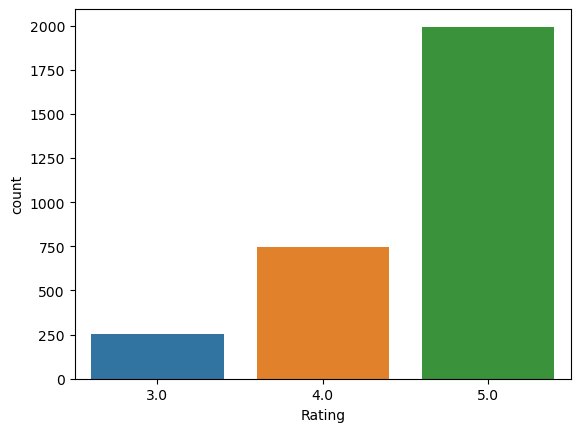

In [9]:
sns.countplot(df.Rating)

In [10]:
# Checking for missing values
df.isnull().sum()

Title       0
Rating    323
Review      0
dtype: int64

<AxesSubplot:>

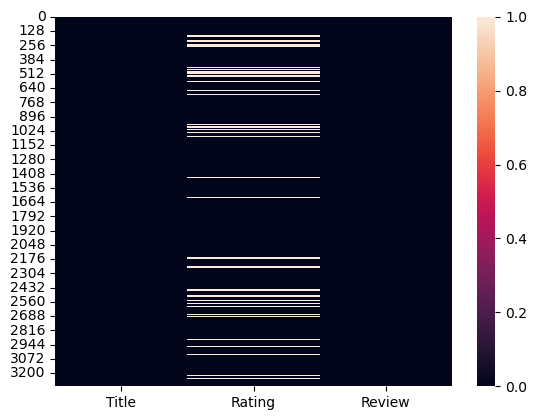

In [11]:
#plotting missing values
sns.heatmap(df.isnull())

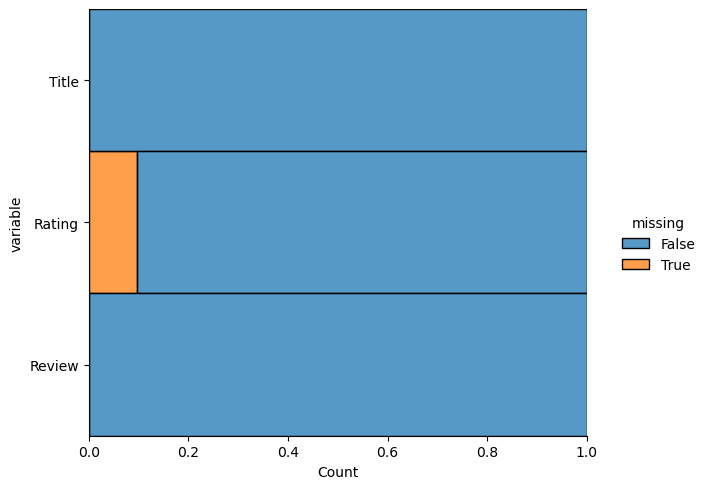

In [12]:
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [13]:
# filling the missing values with 1, when checked found that the comments to be Negative
df.fillna(1, inplace=True)

In [14]:
df.isnull().sum()

Title     0
Rating    0
Review    0
dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

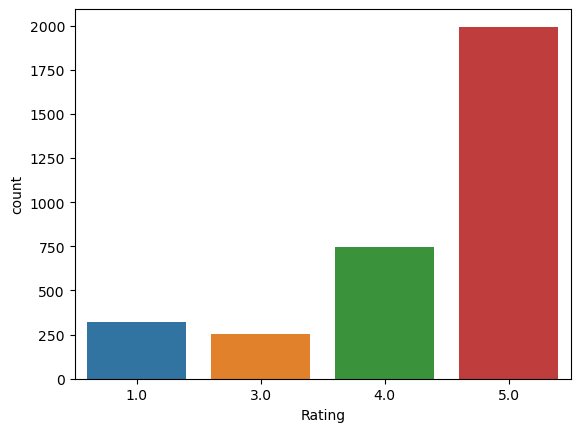

In [15]:
# plotting count plot after filling the missing values with 1`
sns.countplot(df.Rating)

In [16]:
ps = PorterStemmer()

In [17]:
lemmatizer = WordNetLemmatizer()

In [18]:
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^A-Za-z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [19]:
corpus

['nice awesom nice handi feel battrey backup display perform look everyth amaz',
 'camera good need bug fix display classi colour eleg bright get phone lower price featur enough satisfi phone search camera centric phone budget littl high go anoth phone camera littl graini perform wise pretti good expect',
 'look selfi camera total worst back camera awesom review day experi price ohkk ohkk bluetooth sound good total mean need improv camera bluetooth sound',
 'great mobil current time budget display marvel qualiti love much',
 'impress devic best class display camera great ui experi color o far better miui',
 'best mobil price rang back camera qualiti super display also best love amul display price rang also display finger print sacann finger print scanner perform quick overal perform smartphon good suggest dont go g smartphon g smartphon wastag money dont need g smartphon',
 'afford handset good main camera strong batteri life good screen also come g connect perform level blister still 

In [20]:
cv = CountVectorizer()

In [21]:
X = cv.fit_transform(corpus).toarray()

In [22]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
y = df.Rating

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=20)

In [25]:
len(X_train)

2654

In [26]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [27]:
model.fit(X_train, y_train)

MultinomialNB()

In [28]:
model.score(X_test, y_test)

0.6731927710843374

In [29]:
vector = TfidfVectorizer()

In [30]:
X1 = vector.fit_transform(corpus).toarray()

In [31]:
X1.shape

(3318, 1416)

In [32]:
X1_train, X1_test, y_train, y_test = train_test_split(X1,y, test_size=0.20, random_state=20)

In [33]:
len(X_train)

2654

In [34]:
model1 = MultinomialNB()

In [35]:
model1.fit(X_train, y_train)

MultinomialNB()

In [36]:
model1.score(X1_test, y_test)

0.6596385542168675

In [38]:
model.score(X_train, y_train)

0.7185380557648832

In [39]:
model1.score(X1_train, y_train)

0.7117558402411455

In [40]:
pred = model.predict(X_test)

In [41]:
pred1 = model1.predict(X1_test)

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         1.0       0.85      0.60      0.70        65
         3.0       0.25      0.05      0.08        43
         4.0       0.38      0.10      0.15       146
         5.0       0.68      0.96      0.80       410

    accuracy                           0.67       664
   macro avg       0.54      0.42      0.43       664
weighted avg       0.60      0.67      0.60       664



In [44]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

         1.0       0.76      0.43      0.55        65
         3.0       0.50      0.02      0.04        43
         4.0       0.42      0.07      0.12       146
         5.0       0.66      0.97      0.79       410

    accuracy                           0.66       664
   macro avg       0.58      0.37      0.38       664
weighted avg       0.61      0.66      0.57       664



In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test, pred)

array([[ 39,   2,   5,  19],
       [  4,   2,   4,  33],
       [  0,   3,  14, 129],
       [  3,   1,  14, 392]])

In [47]:
confusion_matrix(y_test, pred1)

array([[ 28,   1,   4,  32],
       [  4,   1,   3,  35],
       [  1,   0,  10, 135],
       [  4,   0,   7, 399]])

In [48]:
from sklearn.metrics import plot_confusion_matrix

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


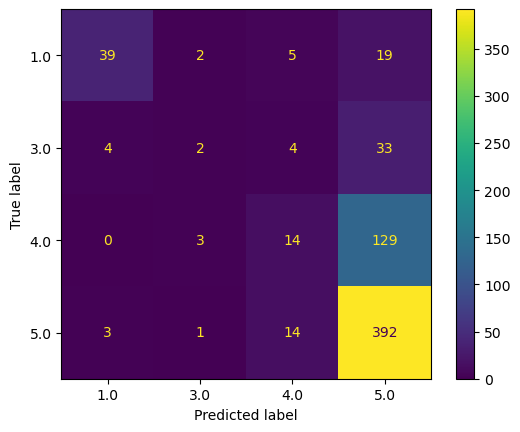

In [49]:
plot_confusion_matrix(model, X_test, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


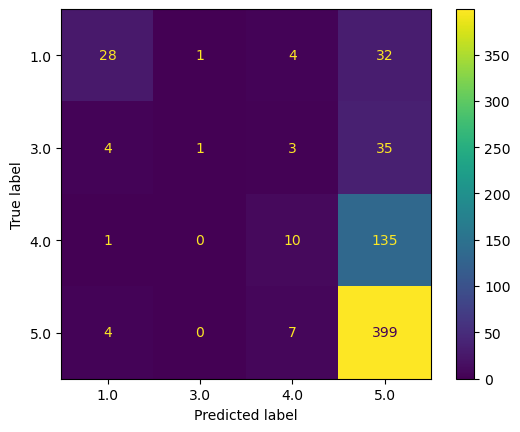

In [50]:
plot_confusion_matrix(model1, X1_test, y_test)